O caixeiro com gasolina infinita (e sem conciência ambiental)
=================



## Introdução



Este desafio consiste na resolução do experimento 'O caixeiro com gasolina infinita' que integra a lista de experimentos que se encontra na pasta de Algoritmos Genéticos.

## Objetivo



Encontrar o caminho de *maior* distância no problema do caixeiro viajante. A rota pode se iniciar em qualquer um dos pontos disponíveis e deve terminar no ponto inicial, visitando todos os demais pontos apenas uma vez. Considerar que a rota entre um ponto e outro é a linha reta que liga os dois pontos. Por último, mostrar o caminho de forma gráfica.

## Considerações do experimento



Considerar um número $n\geq 7$ de coordenadas $(x,y)$ de cidades e que o caixeiro tenha combustível infinito. As coordenadas podem ser geradas de forma aleatória ou simplesmente usar as coordenadas que for desejada. O caixeiro só anda em linha reta e apenas entre duas cidades. O caixeiro começa e termina seu trajeto na mesma cidade e, fora a cidade inicial, ele não visita nenhuma outra cidade mais de uma vez.

## Importações



In [1]:
import random
from itertools import permutations

import matplotlib.pyplot as plt
import networkx as nx

from funcoes import cria_cidades
from funcoes import populacao_inicial_cv as cria_populacao_inicial
from funcoes import funcao_objetivo_cv
from funcoes import funcao_objetivo_pop_cv
from funcoes import selecao_roleta_max as funcao_selecao
from funcoes import cruzamento_ordenado as funcao_cruzamento
from funcoes import mutacao_de_troca as funcao_mutacao

## Códigos e discussão



In [2]:
# CONSTANTES

# relacionadas à busca
TAMANHO_POP = 50
CHANCE_CRUZAMENTO = 0.5
CHANCE_MUTACAO = 0.05
NUM_COMBATENTES_NO_TORNEIO = 3
NUM_GERACOES = 1000

# relacionadas ao problema a ser resolvido
NUM_DE_CIDADES = 7
CIDADES = cria_cidades(NUM_DE_CIDADES)

In [3]:
# Funções locais

def funcao_objetivo_pop(populacao):
    return funcao_objetivo_pop_cv(populacao, CIDADES)
    
def funcao_objetivo_individuo(individuo):
    return funcao_objetivo_cv(individuo, CIDADES)

In [4]:
# Busca por algoritmo genético

populacao = cria_populacao_inicial(TAMANHO_POP, CIDADES)

melhor_fitness_ja_visto = -float("inf")  # começa em menos infinito para considerar o menor valor possível e qualquer valor encontrado é maior que menos infinito

for n in range(NUM_GERACOES):
    
    # Seleção
    
    fitness = funcao_objetivo_pop(populacao)
    populacao = funcao_selecao(populacao, fitness)
    
    # Cruzamento
    
    pais = populacao[0::2]
    maes = populacao[1::2]
    
    contador = 0
    
    for pai, mae in zip(pais, maes):
        if random.random() <= CHANCE_CRUZAMENTO:
            filho1, filho2 = funcao_cruzamento(pai, mae)
            populacao[contador] = filho1
            populacao[contador + 1] = filho2
        
        contador = contador + 2   
        
    # Mutação
    
    for n in range(len(populacao)):
        if random.random() <= CHANCE_MUTACAO:
            individuo = populacao[n]
            populacao[n] = funcao_mutacao(individuo)            
            
    # melhor individuo já visto até agora
    
    fitness = funcao_objetivo_pop(populacao)
    maior_fitness = max(fitness)
    if maior_fitness > melhor_fitness_ja_visto:        
        posicao = fitness.index(maior_fitness)
        melhor_individuo_ja_visto = populacao[posicao]
        melhor_fitness_ja_visto = maior_fitness

In [5]:
# Busca testando todas as permutações

melhor_fitness_ever = - float("inf")

# testando todas as permutações possíveis

for caminho in permutations(list(CIDADES.keys())):
    distancia = funcao_objetivo_individuo(caminho)
    if distancia > melhor_fitness_ever:
        melhor_fitness_ever = distancia
        melhor_resposta_ever = caminho

In [6]:
# Checando os resultados

print()
print("Melhor cidade obtida por algoritmos genéticos:")
print(melhor_individuo_ja_visto, "com distância:", melhor_fitness_ja_visto)

print()
print("Melhor cidade obtida por busca exaustiva:")
print(melhor_resposta_ever, "com distância:", melhor_fitness_ever)


Melhor cidade obtida por algoritmos genéticos:
['Cidade 0', 'Cidade 2', 'Cidade 5', 'Cidade 6', 'Cidade 3', 'Cidade 4', 'Cidade 1'] com distância: 4.357825820264558

Melhor cidade obtida por busca exaustiva:
('Cidade 0', 'Cidade 1', 'Cidade 4', 'Cidade 3', 'Cidade 6', 'Cidade 5', 'Cidade 2') com distância: 4.357825820264558


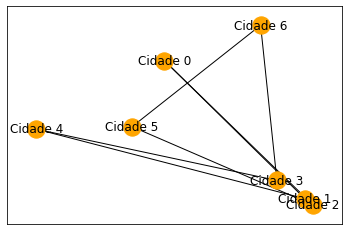

In [7]:
# Geração do grafo

grafo = nx.Graph()
for i in list(CIDADES.keys()):
    grafo.add_node(i)
k = -1
while k < len(melhor_individuo_ja_visto)-1:
    grafo.add_edge(melhor_individuo_ja_visto[k], melhor_individuo_ja_visto[k+1])
    k+=1
vertices = CIDADES.keys()
pos = nx.spring_layout(grafo, pos=CIDADES, fixed = vertices)
nx.draw_networkx(grafo, pos, node_color = 'orange')

## Conclusão



Este algoritmo tem por objetivo identificar a maior distância percorrida pelo caixeiro viajante ao passar por um determinado número de cidades.

Para isso, primeiramente são criadas as cidades aleatoriamente. Em seguida, é definido o indivíduo como uma lista contendo a quantidade de cidades, e a população que tem seu tamanho determinado e recebe as cidades definidas anteriormente. Na sequência, é definida uma função que calcula a distância euclidiana entre dois pontos a e b que correspondem ao intervalo entre duas cidades de referência. Foram definidas duas funções objetivo, sendo a função objetivo que calcula a distância percorrida pelo caixeiro e seu retorno até a cidade inicial, e a função objetivo que se aplica à toda a população.

Esse algoritmo compreende quatro etapas que é a seleção de indivíduos com o melhor ajuste, ou seja, dentro da população são as sequências de cidades que apresentaram a maior distância comparando com todas as cidades geradas aleatoriamente. O cruzamento ordenado entre dois indivíduos, pai e mãe, buscando em posições alternadas da lista. Adiante, é definido um intervado dentro de cada indivíduo para compor parte de um teceiro indivíduo (filho). A mutação ocorre por troca entre as cidades em cada indivíduo filho, comparando com o ajuste estabelecido, a fim de obter os melhores resultados. Por último, é identificado o indivíduo que apresenta o maior ajuste entre os melhores selecionados.

Este é um problema do tipo NP (*Nondeterministic Polynomial*), que é um tipo de problema na teoria da complexidade computacional que se caracteriza pelo tempo de execução de uma função polinomial correspondente ao tamanho de entrada (quantidade de dados a serem processados), mas que não possui solução determinística em tempo polinomial. Dessa forma, a solução pode ser verificada em tempo polinomial, pois encontrar a solução ideal exigiria uma quantidade exponencial de tempo e recurso computacional.

Para o problema do caixeiro viajante, há uma limitação na quantidade de cidades que o algoritmo é capaz de processar, visto que a execução aumenta exponencialmente a cada rodada.

Uma observação é que para esse algoritmo há a necessidade de trabalhar com, no mínimo, quatro cidades, visto que a distância entre dois pontos é a mesma e só pode ser alterada a direção [a-b ou b-a], assim como ocorre para três cidades, apenas alternando a posição de partida e chegada [a-b-c, c-b-a, b-a-c, c-a-b, b-c-a, a-c-b], como num triângulo.

## Playground

